<a href="https://colab.research.google.com/github/Minseung2006/MyFirstRepo/blob/main/DATA_ACCURACY_MODEL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Displays all of the existing files in the directory.
!ls

 chatbots-impact-on-university-learning.zip				'kaggle (5).json'
'Impact of Conversational Chatbots on Learning of University Students'	'kaggle (6).json'
'kaggle (1).json'							'kaggle (7).json'
'kaggle (2).json'							'kaggle (8).json'
'kaggle (3).json'							 kaggle.json
'kaggle (4).json'							 sample_data


In [ ]:
# Let's you have access to the folder you are working on and changing it.
!cd 'Impact of Conversational Chatbots on Learning of University Students' && ls

AI_Chatbots_Math_Tasks_Solutions_Web_Appendix.pdf
AI_Chatbots_Students_Attitude_Dataset_Coded_EN.csv
AI_Chatbots_Students_Attitude_Dataset_EN.csv
AI_Chatbots_Students_Attitude_Online_Questionnaire_Coded_EN.pdf
AI_Chatbots_Students_Attitude_Online_Questionnaire_EN.pdf


In [ ]:
# Installs Kaggle.
!pip install kaggle

# This allows to get access to files from the colab program.
from google.colab import files

# INSERTS THE LIBRARIES.
# Creates the pandas library which holds the dataset.
import pandas as pd

# Creates the numpy library which is where basic arithmetic or advanced
# arithmetic for the dataset or array.
import numpy as np

# This imports the sklearn library which is the main machine learning models.
# *There are a lot of imports from the sklearn library.*
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# This imports the libraries for data visualization(graphs).
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# THIS LOADS THE DATASET.
# This method allows the files to be uploaded.
files.upload()

# The basic syntax of setting up my kaggle API into my machine.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloads the chosen dataset I want and unzips it if necessary.
!kaggle datasets download -d jocelyndumlao/chatbots-impact-on-university-learning
!unzip chatbots-impact-on-university-learning.zip

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/jocelyndumlao/chatbots-impact-on-university-learning
License(s): CC0-1.0
chatbots-impact-on-university-learning.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  chatbots-impact-on-university-learning.zip
replace Impact of Conversational Chatbots on Learning of University Students/AI_Chatbots_Math_Tasks_Solutions_Web_Appendix.pdf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Impact of Conversational Chatbots on Learning of University Students/AI_Chatbots_Math_Tasks_Solutions_Web_Appendix.pdf  
  inflating: Impact of Conversational Chatbots on Learning of University Students/AI_Chatbots_Students_Attitude_Dataset_Coded_EN.csv  
  inflating: Impact of Conversational Chatbots on Learning of University Students/AI_Chatbots_Students_Attitude_Dataset_EN.csv  
  inflating: Impact of Conversational Chatbots on Learning of University Students/AI_Chatbots_Stude

In [ ]:
# Creates a variable that stores the dataset.
df = pd.read_csv('Impact of Conversational Chatbots on Learning of University Students/AI_Chatbots_Students_Attitude_Dataset_EN.csv', encoding = 'ISO-8859-1',
                 delimiter = ';', engine = 'python')

print("\n")

# Creates a new variable that copies the dataset for extra clarification.
dataO = df.copy()
dataO = dataO.rename(columns={'Q1': 'Education', 'Q2': 'Degree', 'Q3': 'Gender', 'Q4': 'Usage'})

# Creates a class to organize multiple categories and store any data that is needed
# to change.
class manage_data:
  def __init__(self, dataO):
    self.data = dataO

  def get_data(self):
    return self.data

  def get_degree(self):
    return self.data['Degree']

  def get_usage(self):
    return self.data['Usage']

# Creates another variable that copies the dataset based on the class.
processing_data = manage_data(dataO)
processing_data = processing_data.get_data()

# Prints the first five rows of the dataset.
print(processing_data.head())



            Timestamp Education                             Degree  Gender  \
0  5.14.2023 21:22:19    Master   International Economic Relations  Female   
1   5.15.2023 8:45:52  Bachelor  International Economic Relations   Female   
2   5.15.2023 9:54:15  Bachelor   International Economic Relations  Female   
3  5.15.2023 15:17:41  Bachelor   International Economic Relations  Female   
4  5.15.2023 15:19:02  Bachelor   International Economic Relations  Female   

       Usage      Q5.1     Q5.2            Q5.3               Q5.4     Q5.5  \
0      Îften     Agree    Agree  Strongly Agree     Strongly Agree    Agree   
1  Sometimes  Disagree    Agree        Disagree  Strongly Disagree  Neutral   
2     Rarely   Neutral  Neutral         Neutral           Disagree  Neutral   
3     Rarely     Agree    Agree           Agree           Disagree    Agree   
4  Sometimes     Agree    Agree         Neutral           Disagree    Agree   

   ...            Q8.2            Q8.3      Q8.4      

In [ ]:
# PREPROCESSES THE DATA.
# Drops any slots that have missing values.
processing_data = processing_data.dropna()

# Converts the dataset in a date to time manner.
processing_data['Timestamp'] = pd.to_numeric(pd.to_datetime(processing_data['Timestamp']))

# This organizes features. X is the input while Y is the output.
X = processing_data.drop('Usage', axis=1)
Y = processing_data['Usage']

<ipython-input-5-ed0ec5371904>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processing_data['Timestamp'] = pd.to_numeric(pd.to_datetime(processing_data['Timestamp']))


In [ ]:
# Apply one-hot encoding from categorical features to numerical features.
# Organizes different categorites based on categorical and numbers.
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

# Converts the categorical columns into readable binary ML model.
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output = False, handle_unknown='ignore'))
])

# This scales the dataset enough for the ML model to calculate the mean to zero and
# Standard Deviation to 1.
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Makes sure that the categorical_pipeline & the numerical_pipeline are running
# properly before executing the full ML model.
preprocessor = ColumnTransformer(
    transformers=[
    ('category', categorical_pipeline, categorical_features),
    ('numerical', numerical_pipeline, numerical_features)
    ])

X_processed = preprocessor.fit_transform(X)

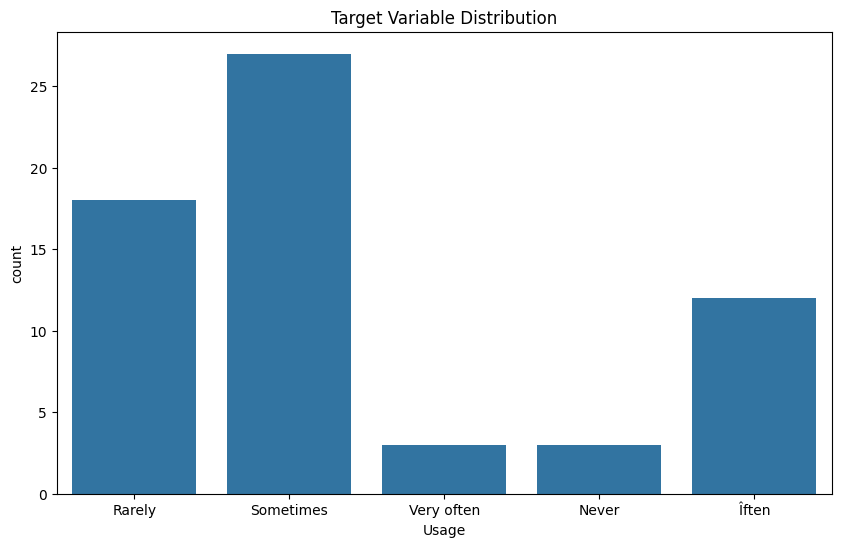

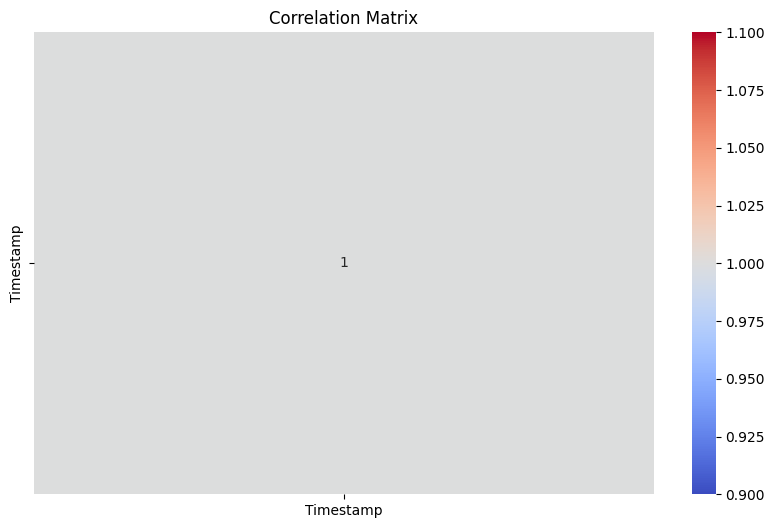

In [ ]:
# Visualize the target variables, x and y.
plt.figure(figsize=(10, 6))
sns.countplot(x='Usage', data=processing_data)
plt.title('Target Variable Distribution')
plt.show()

# Visualize the matrix of the target variables and excludes non numeric columns.
correlation_matrix = processing_data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Split the data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Use the RandomForestClassifier.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Start predictions.
predictions = model.predict(X_test)

# Calculate the accuracy of the model.
accuracy = accuracy_score(Y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.3076923076923077
